
# Descifrando la Regresión Lineal

## Ajustando una Línea a los Datos

El ajuste de una línea a un conjunto de datos es un paso crucial en el análisis estadístico, especialmente después de recopilar datos experimentales. Este enfoque revela cómo se pueden descubrir patrones y tendencias en los conjuntos de datos que permitan la construcción de modelos predictivos y en un análisis detallado de datos.

Un paso común, tras realizar un experimento y obtener datos, es trazar un gráfico XY. Esta visualización es fundamental para una primera inspección, ofreciendo una perspectiva clara de las tendencias y patrones que podrían no ser inmediatamente evidentes en una tabla de datos. En el gráfico XY, cada eje representa una variable diferente, lo que permite evaluar la relación entre ellas.

In [43]:
import pandas as pd
import numpy as np

np.random.seed(0)

n = 30
id = range(1, n + 1)
# https://www.eltiempo.com/archivo/documento/CMS-13128617
height = np.random.normal(172, 8, n)
# Body mass index (BMI)
# https://en.wikipedia.org/wiki/Body_mass_index
# weight = BMI * height^2
bmi = 26 + np.random.normal(0, 2.5, n)
weight = bmi * ((height/100) ** 2)
commute_time = np.random.uniform(15, 60, n)

data = pd.DataFrame({'ID': id, 'Height': height, 'Weight': weight, 'BMI': bmi})
data.sort_values(by=['Height'],inplace=True,ignore_index=True)
data.round()

,ID,Height,Weight,BMI
0,21,152.0,55.0,24.0
1,26,160.0,70.0,27.0
2,6,164.0,71.0,26.0
3,20,165.0,69.0,25.0
4,24,166.0,64.0,23.0
5,18,170.0,81.0,28.0
6,28,171.0,78.0,27.0
7,8,171.0,85.0,29.0
8,9,171.0,73.0,25.0
9,27,172.0,78.0,26.0


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [45]:
def get_b_from_mean_point(a, y_mean, x_mean):
  b = y_mean - a * x_mean
  return b

def get_y_list(a, b, x_list):
  y_list = a * x_list + b
  return y_list

def plot_mean_point_line(a, y_mean, x_mean, x_list, color, alpha):
  b = get_b_from_mean_point(a, y_mean, x_mean)
  y_list = get_y_list(a, b, x_list)
  plt.plot(x_list, y_list, color=color, alpha=alpha)


Para identificar tendencias, es útil añadir una línea. Sin embargo, surge una pregunta fundamental: ¿cuál es la línea más apropiada para representar estos datos? Varias líneas pueden ser candidatas, y nuestra tarea es determinar cuál de ellas se ajusta mejor.

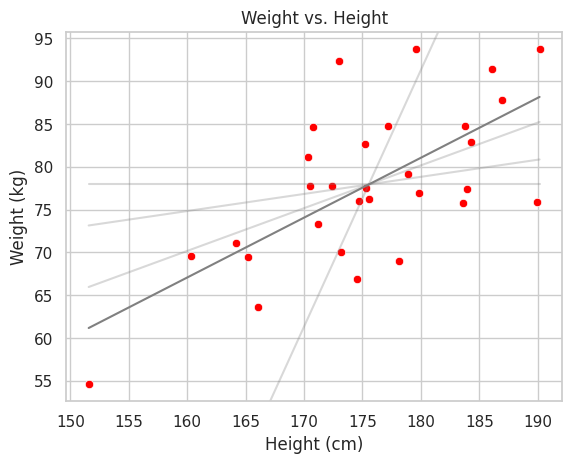

In [46]:
sns.scatterplot(x='Height', y='Weight', data=data, color='red')

height_mean = data['Height'].mean()
weight_mean = data['Weight'].mean()
a=0.7
plot_mean_point_line(a, weight_mean, height_mean, x_list=data['Height'], color='gray', alpha=1)
slopes = [0, 0.2, 0.5, 3]
for a in slopes:
  plot_mean_point_line(a, weight_mean, height_mean, x_list=data['Height'], color='gray', alpha=0.3)

plt.title('Weight vs. Height')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.ylim(data['Weight'].min()-2, data['Weight'].max()+2)
plt.show()

Un punto de partida para esta discusión es considerar una línea horizontal que pasa por el valor promedio de Y en nuestros datos. Aunque probablemente sea la peor adaptación, sirve como una base útil para entender cómo encontrar la línea óptima. Esta línea horizontal corta el eje Y en un punto que llamaremos $b$, que representa el valor medio de Y en el conjunto de datos específico. Por ejemplo, si el valor medio de Y es 77,93, entonces b es 77,93.


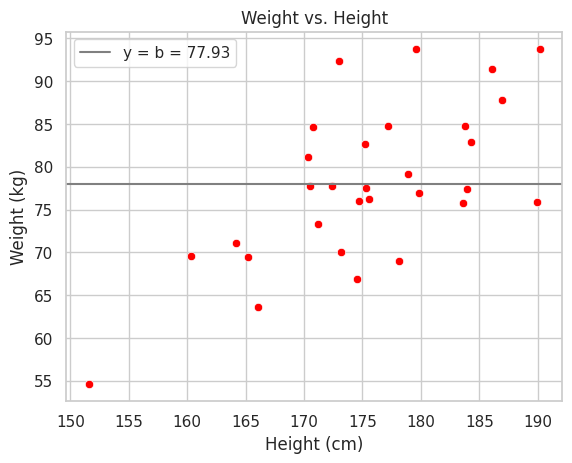

In [47]:
sns.scatterplot(x='Height', y='Weight', data=data, color='red')
plt.axhline(y=weight_mean, color='gray', label=f'y = b = {weight_mean:.2f}')
plt.title('Weight vs. Height')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.ylim(data['Weight'].min()-2, data['Weight'].max()+2)
plt.legend()
plt.show()

## Evaluación de la Línea de Ajuste

Para evaluar qué tan bien se ajusta esta línea a los datos, observamos su proximidad a los puntos individuales. Empezando con el punto en la esquina inferior izquierda del gráfico, con coordenadas x1, y1, trazamos una línea hasta la línea horizontal. La distancia desde este punto hasta la línea es b - y1. Repetimos este proceso para cada punto, sumando las distancias.

$$ (b - y_1) + (b - y_2) + (b - y_3) + \cdots$$

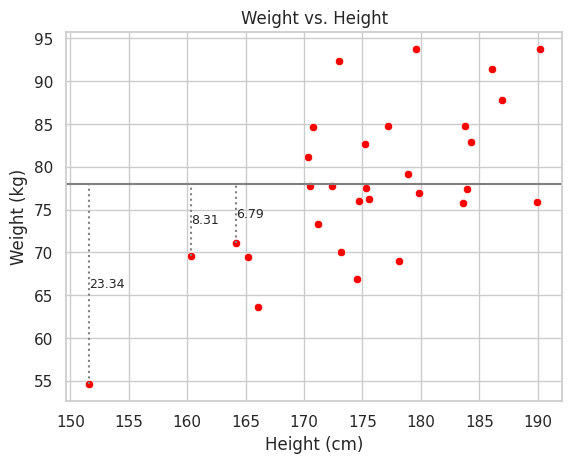

In [48]:
sns.scatterplot(x='Height', y='Weight', data=data, color='red')
plt.axhline(y=weight_mean, color='gray')
for i in range(n)[:3]:
    plt.plot([data['Height'][i], data['Height'][i]], [data['Weight'][i], weight_mean], color='gray', linestyle=':')
    plt.text(data['Height'][i], (data['Weight'][i] + weight_mean) / 2, f"{weight_mean - data['Weight'][i]:.2f}", fontsize=9, va='center', ha='left')

plt.title('Weight vs. Height')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.ylim(data['Weight'].min()-2, data['Weight'].max()+2)
plt.show()

Sin embargo, surge un problema, si se utiliza esta misma fórmula con los puntos que están por encima de la línea horizontal dichos valores darían negativos, lo cual afectaría incorrectamente nuestra evaluación del ajuste.

Para evitar este problema, los primeros investigadores optaron por elevar al cuadrado cada término, asegurando que todos los valores sean positivos. La ecuación resultante, que representa la suma total de las distancias al cuadrado (RSS) de los puntos de datos desde la línea horizontal, nos da una medida de qué tan bien se ajusta esta línea a los datos.

$$ RSS = (y_1 - b)^2 + \cdots + (y_n - b)^2 $$

Para nuestro ejemplo, la evaluación del ajuste de una línea igual a la media es de 2.426,42. Además, se observa que al rotar esta línea ligeramente, la suma de los residuos cuadrados disminuye a 1.900,43, indicando una mejor adecuación. Al rotar aún más, esta suma se reduce a 1.448,51. Sin embargo, una rotación excesiva puede deteriorar el ajuste, como se muestra cuando la suma aumenta a 13.412,22, lo cual revela que existe un punto óptimo entre una línea de ajuste completamente horizontal y una línea de ajuste completamente vertical.

In [49]:
def get_rss_y_predict(a, b, x_list, y_list):
    y_predict = get_y_list(a, b, x_list)
    rss = ((y_list - y_predict) ** 2).sum()
    return rss, y_predict

def get_rss(a, b, x_list, y_list):
  rss, y_predict = get_rss_y_predict(a, b, x_list, y_list)
  return rss

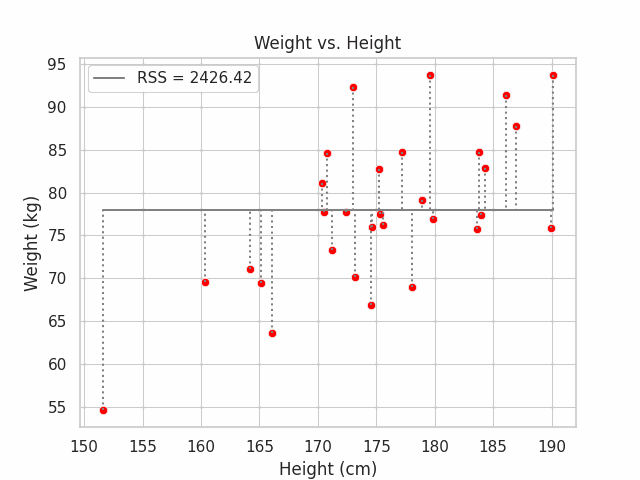

In [50]:
from matplotlib.animation import FuncAnimation

def update(a):
    plt.cla()
    b = get_b_from_mean_point(a, weight_mean, height_mean)
    rss, weight_pred = get_rss_y_predict(a, b, data['Height'], data['Weight'])

    sns.scatterplot(x='Height', y='Weight', data=data, color='red')
    sns.lineplot(x=data['Height'], y=weight_pred, color='gray', label=f'RSS = {rss:.2f}')
    for i in range(n):
        plt.plot([data['Height'][i], data['Height'][i]], [data['Weight'][i], weight_pred[i]], color='gray', linestyle=':')
    plt.title('Weight vs. Height')
    plt.xlabel('Height (cm)')
    plt.ylabel('Weight (kg)')
    plt.ylim(data['Weight'].min()-2, data['Weight'].max()+2)

fig, ax = plt.subplots()
ani = FuncAnimation(fig, update, frames=slopes, interval=2000)
gif_path = "rss_slopes.gif"
ani.save(gif_path, writer='pillow')
plt.close()
from IPython.display import Image
Image(open(gif_path,'rb').read())

## El Método de Mínimos Cuadrados

Para encontrar este punto óptimo, se utiliza la ecuación genérica de una línea $ y = a*x + b $ , donde $ a $ es la pendiente y $ b $ es la intersección con el eje Y. El objetivo es hallar los valores óptimos de $ a $ y $ b $ que minimicen la suma de los residuos cuadrados.

Esta suma, en términos matemáticos más generales, se representa mediante una ecuación más compleja, pero en esencia, mide la distancia entre la línea y los valores observados.

$$ RSS = \sum_{i=1}^{n} (y_i - (a*x_i + b))^2 $$

El método utilizado para encontrar los mejores valores de $ a $ y $ b $ se conoce como el método de los mínimos cuadrados.

Este enfoque busca la línea que ofrece la menor suma de los cuadrados de las diferencias. Si graficamos la suma de los residuos cuadrados contra cada rotación de la línea, observamos que esta suma disminuye al principio con la rotación, pero puede aumentar si la línea se rota demasiado.

Para determinar la rotación óptima de la línea, se recurre al cálculo diferencial. La derivada de la función nos indica la pendiente en cada punto. En el extremo izquierdo, la pendiente es pronunciada, pero se suaviza a medida que avanzamos hacia la derecha. El punto donde la pendiente es cero, es decir, donde tenemos el valor mínimo de los cuadrados, indica la rotación óptima.

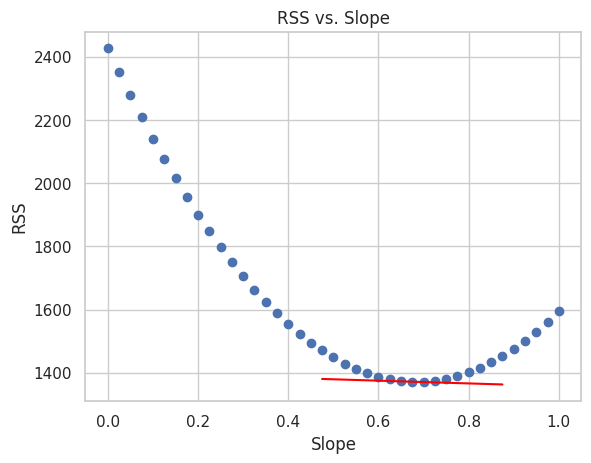

In [51]:
def tangent_line(slope_at_point, h, long):
    b_at_point = get_b_from_mean_point(slope_at_point, weight_mean, height_mean)
    rss_at_point = get_rss(slope_at_point, b_at_point, data['Height'], data['Weight'])
    b_at_point_plus_h = get_b_from_mean_point(slope_at_point + h, weight_mean, height_mean)
    rss_at_point_plus_h = get_rss(slope_at_point + h, b_at_point_plus_h, data['Height'], data['Weight'])
    derivative_at_point = (rss_at_point_plus_h - rss_at_point) / h
    tangent_slopes = np.linspace(slope_at_point - long, slope_at_point + long, 4)
    tangent_rss = derivative_at_point * (tangent_slopes - slope_at_point) + rss_at_point
    plt.plot(tangent_slopes, tangent_rss, color='red')

slopes_2 = np.linspace(0,1,41)
rss_list = [get_rss(a, get_b_from_mean_point(a, weight_mean, height_mean),data['Height'], data['Weight']) for a in slopes_2]


plt.scatter(slopes_2, rss_list)

h = 0.001
for slope_at_point in slopes_2[27:28]:
  tangent_line(slope_at_point, h, long=0.2)

plt.title('RSS vs. Slope')
plt.xlabel('Slope')
plt.ylabel('RSS')
plt.show()

Es importante tener en cuenta que diferentes rotaciones corresponden a distintos valores para $a$ (la pendiente) y $b$ (la intersección). Utilizando un gráfico 3D, es posible visualizar cómo distintos valores para la pendiente y la intersección afectan la suma total de los cuadrados.

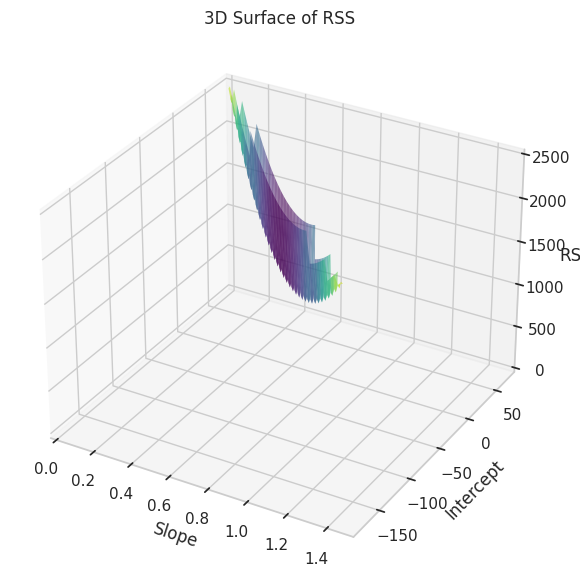

In [52]:
a_min = 0
a_max = 1.5
b_min = get_b_from_mean_point(a_max, weight_mean, height_mean)
b_max = get_b_from_mean_point(a_min, weight_mean, height_mean)
slopes = np.linspace(a_min, a_max, 201)
intercepts = np.linspace(b_min, b_max, 201)
rss_values = np.array([[get_rss(a, b, data['Height'], data['Weight']) for a in slopes] for b in intercepts])
slope_mesh, intercept_mesh = np.meshgrid(slopes, intercepts)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
rss_max = 2500

rss_values[rss_values>rss_max]=np.nan

ax.plot_surface(slope_mesh, intercept_mesh, rss_values, cmap='viridis', edgecolor='none', alpha=0.6)
ax.set_xlabel('Slope')
ax.set_ylabel('Intercept')
ax.set_zlabel('RSS')
ax.set_title('3D Surface of RSS')
ax.set_xlim(a_min, a_max)
ax.set_ylim(b_min,b_max)
ax.set_zlim(0, rss_max)
plt.show()

Como culminación de nuestro ejemplo, se obtiene que la ecuación que mejor se ajusta a los datos es $y = 0.69 * x - 42.35$.

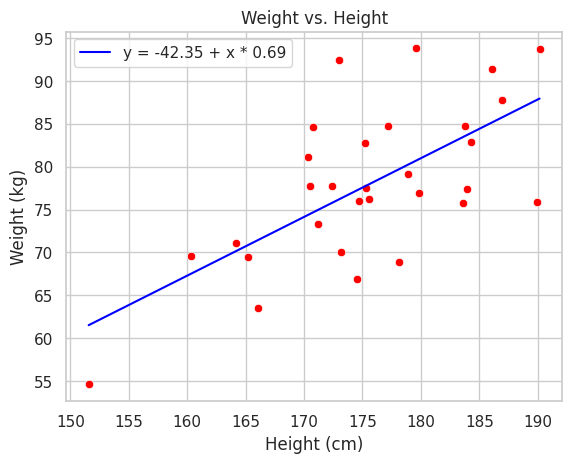

In [53]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(data[['Height']], data['Weight'])
weight_pred = model.predict(data[['Height']])

sns.scatterplot(x='Height', y='Weight', data=data, color='red')
sns.lineplot(x=data['Height'], y=weight_pred, color='blue', label=f'y = {model.intercept_:.2f} + x * {model.coef_[0]:.2f}')
plt.title('Weight vs. Height')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

## Conclusiones

La regresión lineal es un método fundamental en el análisis estadístico que se basa esencialmente en dos conceptos clave para establecer la relación entre variables independientes y dependientes.

El primero de estos conceptos se centra en la minimización de las distancias al cuadrado entre los valores observados de nuestra variable dependiente y los valores predichos por nuestra línea de regresión. Esta técnica, conocida como el método de mínimos cuadrados, asegura que la línea generada sea la que mejor se ajuste a los datos.

El segundo concepto implica el uso del cálculo y las derivadas para identificar el punto exacto donde esta suma de cuadrados residuales alcanza su valor mínimo. Al encontrar el punto donde la derivada se iguala a cero, podemos precisar la pendiente y el intercepto que definen la línea óptima de ajuste.

En conjunto, estos métodos no solo simplifican el proceso de ajuste sino que también garantizan que la línea resultante ofrezca la estimación más exacta.